In [356]:
%pylab inline
from scipy.integrate import quad
import numpy.ma as ma

Populating the interactive namespace from numpy and matplotlib


Problem 1)

In [321]:

class Cosmology:
    
    def __init__(self,omega_r,omega_m,omega_l,H_0):
        self.H_0 = H_0/3.086e19
        self.omega_r = omega_r
        self.omega_m = omega_m
        self.omega_l = omega_l
        self.omega_0 = (omega_r+omega_m+omega_l)
        pass
    
    def friedmann(self, x, fcn_of):
        
        if fcn_of == 'a':
            
            t = ((self.H_0**2.0*(self.omega_r*(x**-2.0)+self.omega_m*(x**-1.0) +
            self.omega_l*(x**2.0)+(1.0-self.omega_0+0.j)))**-0.5)
            if imag(t)==0.j:
                return abs(t)
            else:
                pass 
        
#         if fcn_of == 'z':
#             return prefix*(self.omega_r*(1.0+x)**4.0+self.omega_m*(1.0+x)**3.0 +
#             self.omega_l+(1-self.omega_0)*(1.0+x)**2.0)
        else:
            pass
        
        

In [322]:
loiter = Cosmology(0.0,0.55,2.055,70)

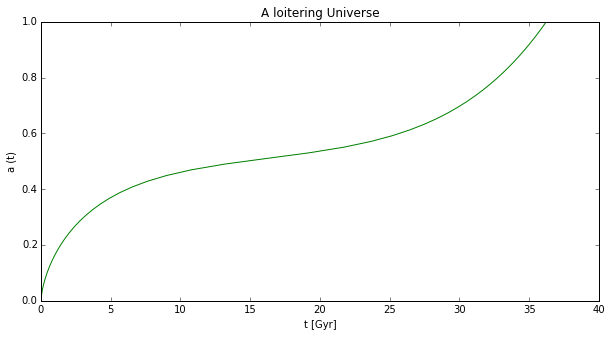

(1.1423398168985019e+18, 68909184.0)

In [323]:
loiter = Cosmology(0.0,0.55,2.055,70)
def integrand(x):
    try:
        return quad(loiter.friedmann,0.0,x,args = ('a',))
    except:
        return np.nan,np.nan
integrate = vectorize(integrand)
a = np.linspace(0,1)
t,err = integrate(a)
  
figure(figsize=(10,5))
plot(t/(1e9*365*24*3600),a,ls='-',c='g')
title('A loitering Universe')
xlabel('t [Gyr]')
ylabel('a (t)')
show()
integrand(1.0)

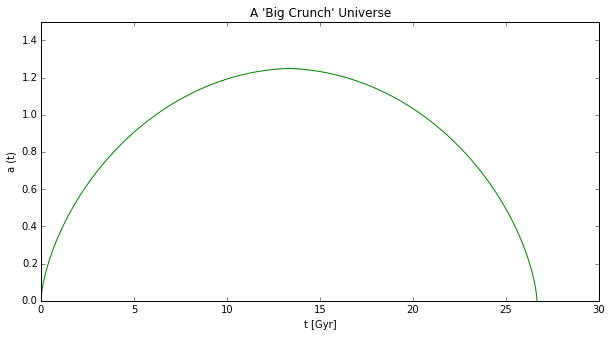

In [384]:
loiter = Cosmology(0.0,5.0,0.0,70)
def integrand(x):
    try:
        return quad(loiter.friedmann,0.0,x,args = ('a',))
    except:
        return np.nan,np.nan
    
integrate = vectorize(integrand)
a = np.linspace(0,1.5,2000)
t,err = integrate(a)
 
t2 = ma.masked_invalid(t)
a2 = ma.masked_array(a,mask=t2.mask)
    
def integrand2(x):
    try:
        return quad(loiter.friedmann,a2.max(),x,args = ('a',))
    except:
        return np.nan,np.nan    
    
integrate2 = vectorize(integrand2)
a3 = np.linspace(a2.max(),0,1000)  
t3,err3 = integrate2(a3)
    
figure(figsize=(10,5))
plot(t2/(1e9*365*24*3600),a2,ls='-',c='g')
plot((t2.max()-t3)/(1e9*365*24*3600),a3,ls='-',c='g')
title("A 'Big Crunch' Universe")
xlabel('t [Gyr]')
ylabel('a (t)')
ylim(0,1.5)

show()


Problem 2)

The Einstein Ring has the form:

$\theta_{E}^{2} = \frac{4 G M D_{LS}}{c^{2}D_{L}D_{S}}$

With a Singular Isothermal Sphere mass density of form:

$\rho(r) = \frac{\sigma_{\nu}^{2}}{2 \pi G r^{2}}$

The mass enclosed within a sphere of radius R then is:

$M(R) = \int^{R} \rho(r) d \vec{ \mathbf{r}} = \int^{R}_{0} \int^{\pi}_{0} \int^{2\pi}_{0}\frac{\sigma_{\nu}^{2}}{2 \pi G r^{2}}r^{2}d\phi d cos\theta dr = \frac{2 \sigma_{\nu}^{2} R}{G}$ 

With this in hand we can go ahead and solve the Einstein Ring for M:

$M = \frac{\theta^{2} c^{2} D_{L} D_{S}}{4 G D_{LS}}$

This we equate to the radius dependent Mass found above:

$M = \frac{\theta^{2} c^{2} D_{L} D_{S}}{4 G D_{LS}} \approx \frac{2 \sigma_{\nu}^{2} R}{G}$

Solve for the velocity dispersion:

$\sigma_{\nu}^{2} \approx \frac{\theta^{2} c^{2} D_{L} D_{S}}{8 R D_{LS}}$

With the small angle approximation $\theta \approx R/D_{S}$:

$\sigma_{\nu}^{2} \approx \frac{\theta \, c^{2}D_{S}}{8 D_{LS}}$

This form can then be simplified if we take $\theta$ to be in arcseconds instead if radians:

$\sigma_{\nu} \approx 10^{3}km s^{-1} (\frac{\theta \, D_{S}}{22 D_{LS}})^{1/2}$